In [1]:
# Importing libraries and modules of Python Required for Data Cleaning and Analysis.

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing initial data from CSV File saved in Downloads:

df = pd.read_csv("C:/Users/Yash/Downloads/Placement_Data.csv")

# PART A - Data Cleaning

In [40]:
# Cheking Shape of the Data:

df.shape

(1624, 15)

### Dealing with Null values, Noise, inappropriate Data types and Redundant Columns in the Data:

In [5]:
# Checking for Number of Null Values in different columns in Dataset:

df.isnull().sum()

Serial_Number      0
Gender             0
SSC_Per            0
SSC_Board          0
HSC_Per            0
HSC_Board          2
HSC_Stream         2
Degree_Per         0
Degree_Stream      0
Work_Exp           0
Entrance_Perc      0
Specialisation     0
MBA_Per            0
Status             0
Salary            67
dtype: int64

In [4]:
# Replacing Null values of Salary Column with 0 as it's blank for only those candidates, who are not placed and their salary- 0:

df["Salary"].fillna(0, inplace = True)

In [7]:
# Replacing Null values of HSC_Board and HSC_Stream columns with Mode of that column:

for i in df.columns:
    df = df.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [8]:
df[["Salary","HSC_Board","HSC_Stream"]].isnull().sum()

Salary        0
HSC_Board     0
HSC_Stream    0
dtype: int64

In [9]:
# Checing for Noise values in the columns and dropping the rows having the noise values as only 2 such rows are there:

for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep = '\n')

Serial_Number
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]


Gender
['F' 'M']


SSC_Per
[40.89 41.   43.   44.   45.   46.   47.   48.   49.   50.   51.   51.57
 52.   52.5

In [10]:
for i in df.columns:
    df = df[~df[i].isin(["0","326"])]

In [11]:
# Removing redundant column "Serial_Number", as it will have no impact on Salary/Employment Status but it can create biasness:

df = df.drop("Serial_Number", axis = 1)

In [12]:
df.columns

Index(['Gender', 'SSC_Per', 'SSC_Board', 'HSC_Per', 'HSC_Board', 'HSC_Stream',
       'Degree_Per', 'Degree_Stream', 'Work_Exp', 'Entrance_Perc',
       'Specialisation', 'MBA_Per', 'Status', 'Salary'],
      dtype='object')

In [30]:
# Checking for Data types of the Columns and changing them accordingly:

df.dtypes

Gender             object
SSC_Per            object
SSC_Board          object
HSC_Per           float64
HSC_Board          object
HSC_Stream         object
Degree_Per        float64
Degree_Stream      object
Work_Exp           object
Entrance_Perc     float64
Specialisation     object
MBA_Per           float64
Status             object
Salary             object
dtype: object

In [26]:
df.head(1)

,Gender,SSC_Per,SSC_Board,HSC_Per,HSC_Board,HSC_Stream,Degree_Per,Degree_Stream,Work_Exp,Entrance_Perc,Specialisation,MBA_Per,Status,Salary
0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [32]:
df[["SSC_Per","Salary"]] = df[["SSC_Per","Salary"]].astype('float64')

### Outliers analysis and removal from numerical columns of the Data:

In [13]:
# Making lists having names of Numerical and Categorical columns:

num = []
cat = []

for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [14]:
num, cat

(['SSC_Per', 'HSC_Per', 'Degree_Per', 'Entrance_Perc', 'MBA_Per', 'Salary'],
 ['Gender',
  'SSC_Board',
  'HSC_Board',
  'HSC_Stream',
  'Degree_Stream',
  'Work_Exp',
  'Specialisation',
  'Status'])

<AxesSubplot:xlabel='SSC_Per'>

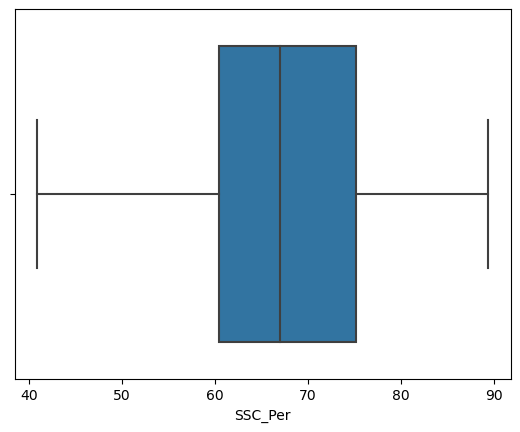

In [15]:
# Outlier analysis of numerical columns using Box plot:

sns.boxplot(x = 'SSC_Per', data = df)

# 'SSC_Per' has no outliers:

<AxesSubplot:xlabel='HSC_Per'>

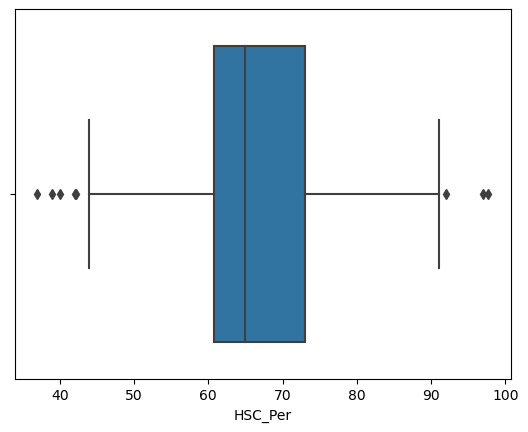

In [16]:
sns.boxplot(x = 'HSC_Per', data = df)

# 'HSC_Per' has 7 outliers:

<AxesSubplot:xlabel='Degree_Per'>

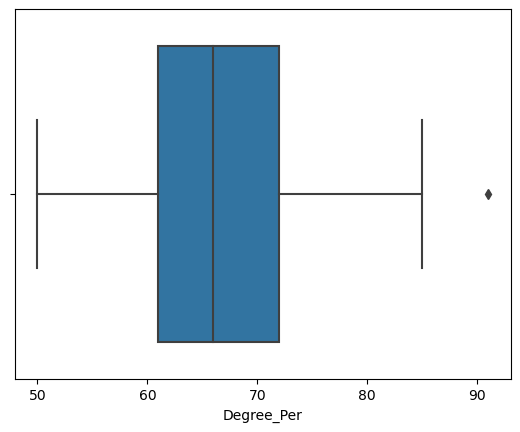

In [17]:
sns.boxplot(x = 'Degree_Per', data = df)

# 'Degree_Per' has 1 outlier:

<AxesSubplot:xlabel='Entrance_Perc'>

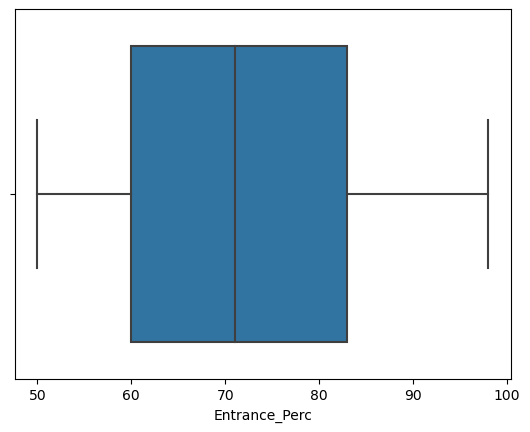

In [18]:
sns.boxplot(x = 'Entrance_Perc', data = df)

# 'Entrance_Perc' has no outliers:

<AxesSubplot:xlabel='MBA_Per'>

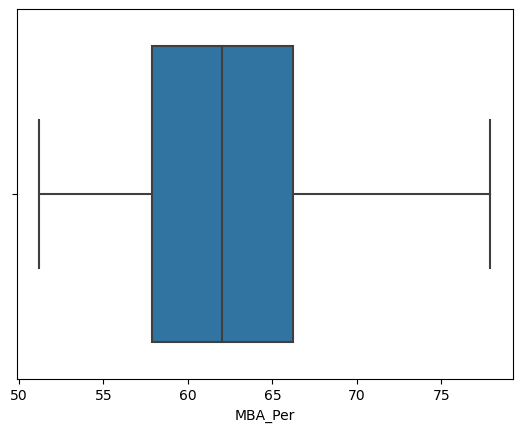

In [19]:
sns.boxplot(x = 'MBA_Per', data = df)

# 'MBA_Per' has no outliers:

<AxesSubplot:xlabel='Salary'>

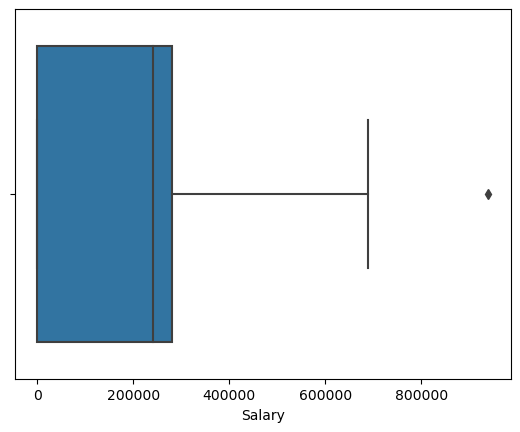

In [20]:
sns.boxplot(x = 'Salary', data = df)

# 'Salary' has 1 outlier:

In [21]:
# Removing rows having outliers in numerical columns:

for i in num:
    q3 = df[i].quantile(0.75)
    q1 = df[i].quantile(0.25)
    IQR = q3-q1
    ul = q3 + 1.5 * IQR
    ll = q3 - 1.5 * IQR
    df = df[(df[i] < ul) & (df[i] > ll)]

# Part B: Data Analysis

### Creating Scatter Plot on SSC %, HSC % and generalising on the basis of placement status.

<AxesSubplot:xlabel='SSC_Per', ylabel='HSC_Per'>

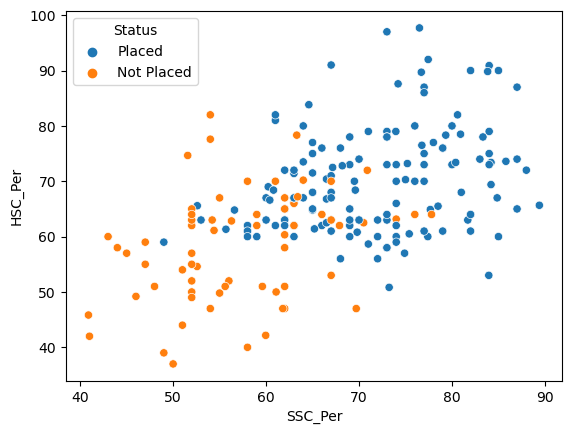

In [22]:
sns.scatterplot(x = df["SSC_Per"], y = df["HSC_Per"], hue = df["Status"])

In [ ]:
# It shows that People having Lower Percentage in High School are mostly not placed and others are mostly placed.
# It shows high Correlation between High School % and Placement Status.

### Creating Pairplot on Numerical columns with Diagonal chart as KDE.

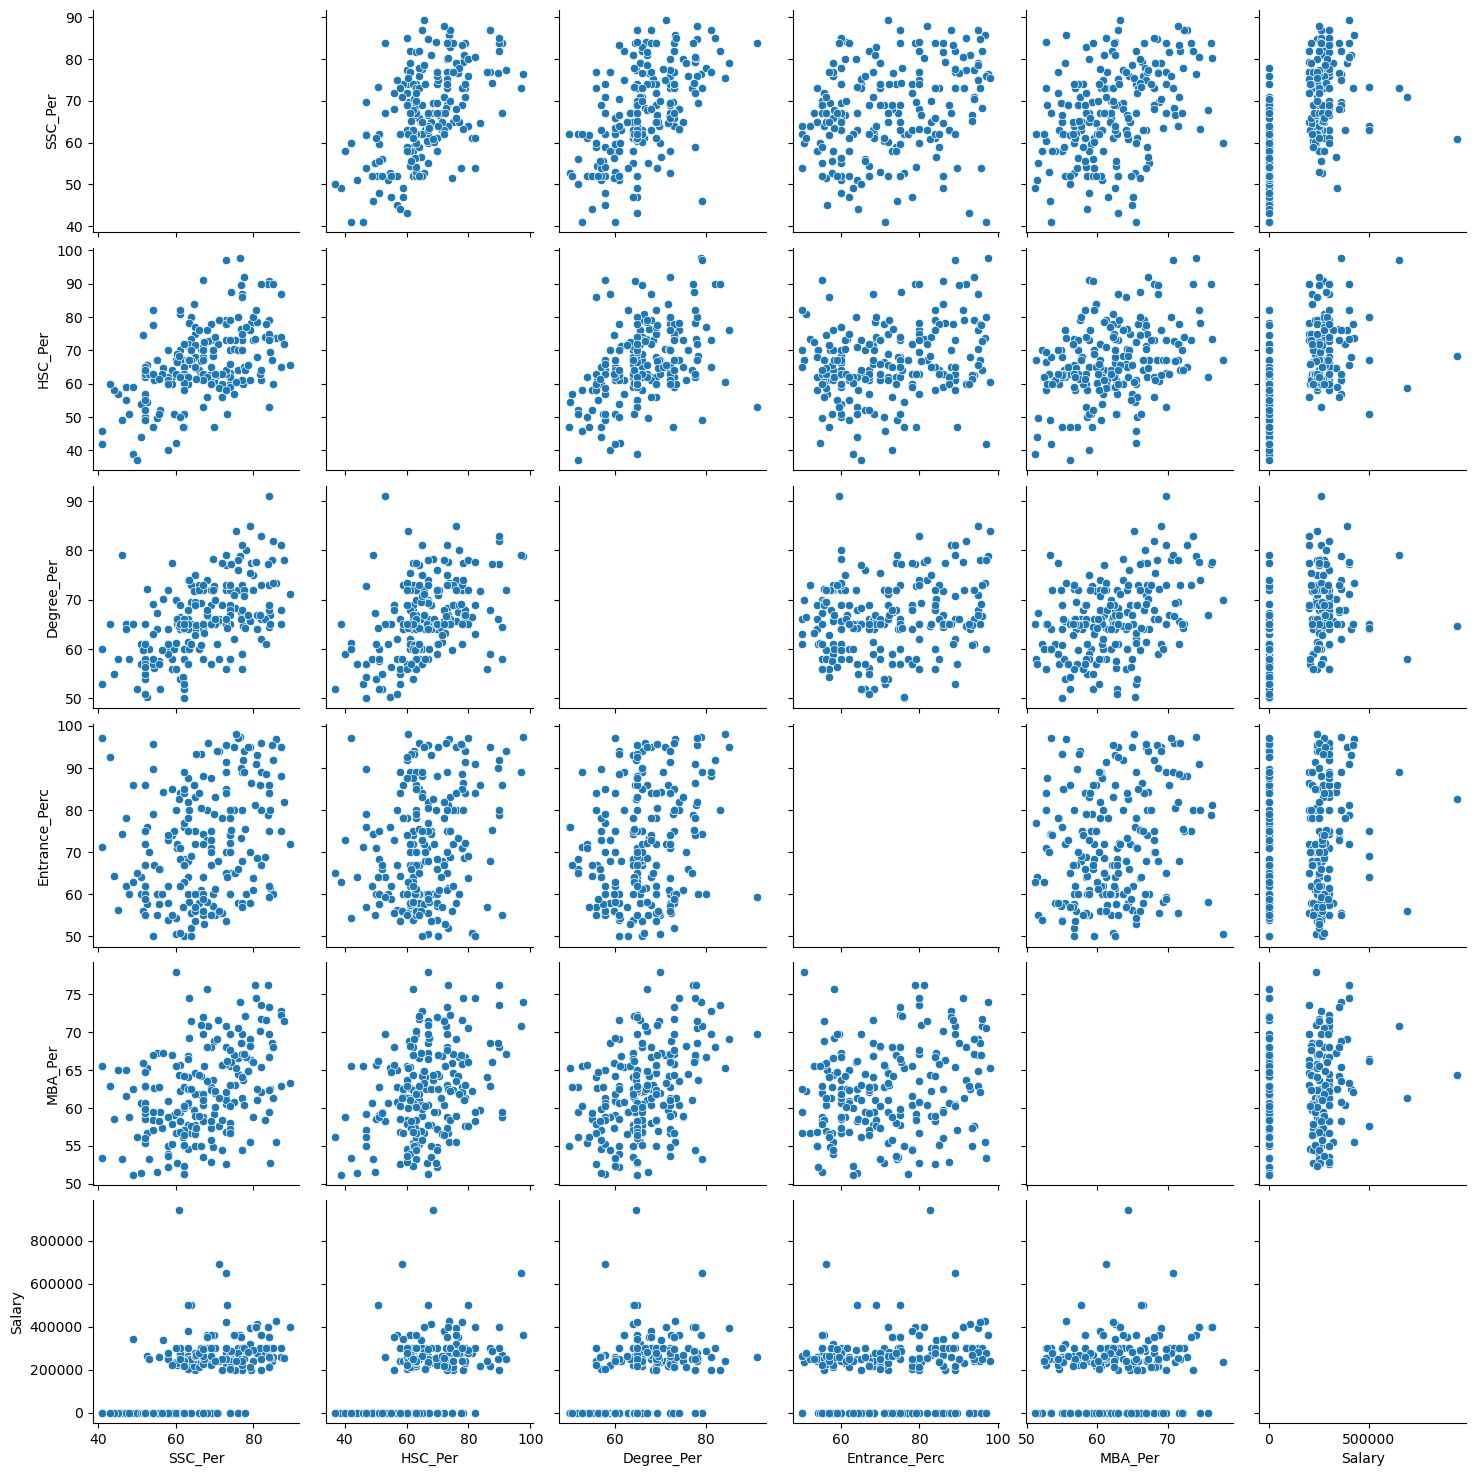

In [34]:
sns.pairplot(df,diag_kind='KDE')

### Creating Box plot on Degree Percentage for placed and unplaced students.

<AxesSubplot:xlabel='Status', ylabel='Degree_Per'>

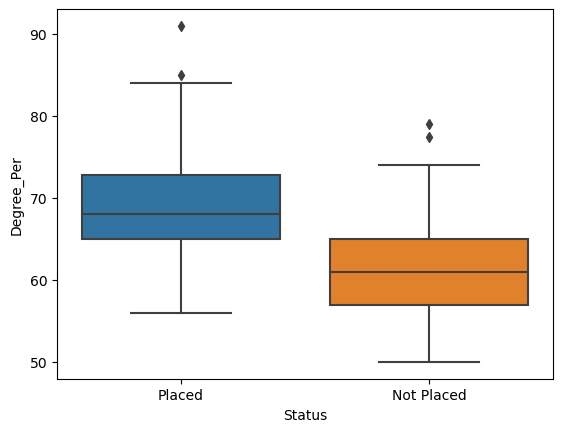

In [37]:
sns.boxplot(x = df["Status"], y = df["Degree_Per"])

In [ ]:
# It shows that People having Lower Percentage in Graduation are mostly not placed and others are mostly placed.
# It shows high Correlation between Graduation % and Placement Status.

### Creating Heat Map on Numerical columns to check correlation between the Columns.

<AxesSubplot:>

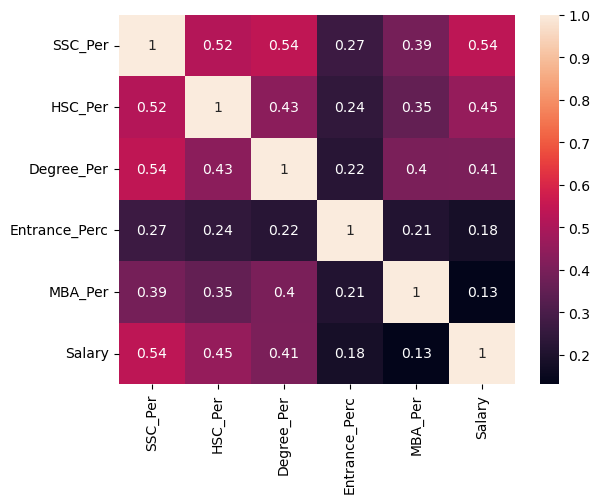

In [38]:
sns.heatmap(df.corr(),annot = True)

### Plotting Histogram to check the distribution of Salary:

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

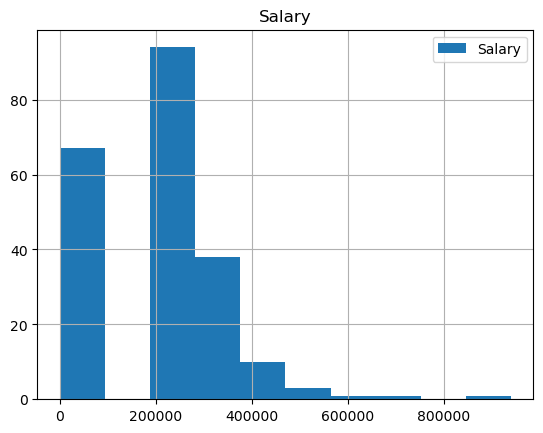

In [7]:
df.hist(column = "Salary", legend = True)

In [ ]:
# This shows that aroud 70 people earn 0 salary, as they are not placed.
# Around 95 people (max) earn salary between 18000 and 30000.
# Count of people decreases with increasing salary.

# Exporting the Cleaned Data as CSV to use it for Building ML Models:

In [39]:
df.to_csv("Employment_Prediction_ML_Project.csv")